In [73]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier  

In [74]:
dataset_preprocessed = '../data/processed/diabetes.csv'
pd_diabetes = pd.read_csv(dataset_preprocessed)

In [75]:
pd_diabetes.head(1)

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,193,77,49,3.9,19,1,61,119,22.5,118,70,32,38,0.84,0


In [76]:
X = pd_diabetes.drop('Diabetes', axis=1)
y = pd_diabetes.Diabetes

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [78]:
pipeline.score(X_test, y_test)

0.8775510204081632

In [79]:
y_hat = pipeline.predict(X_test)

In [80]:
cm = confusion_matrix(y_test, y_hat)

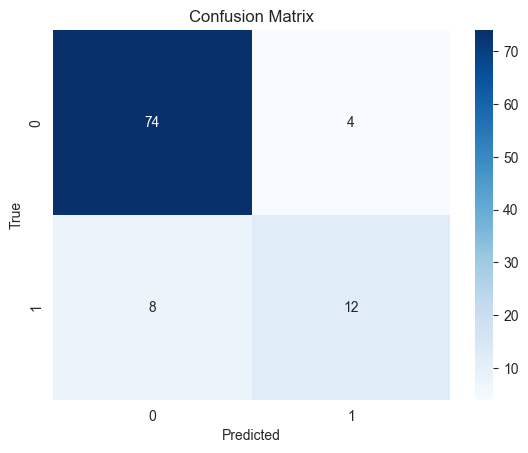

In [81]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [82]:
def create_mlp_model():
    model = Sequential()
    model.add(Dense(45, input_dim=X.shape[1], activation='relu'))  
    model.add(Dense(32, activation='relu'))  
    model.add(Dense(1, activation='tanh'))  
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)


pipeline = make_pipeline(
    StandardScaler(),  # Estandariza los datos
    KerasClassifier(model=create_mlp_model, epochs=100, batch_size=32, verbose=1)
)

Epoch 1/100


/Users/rodrigosantacruzespino/Documents/Hack/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7791 - loss: 1.5055
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 1.0049 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8904 - loss: 0.9615 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9144 - loss: 0.7238 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9042 - loss: 0.8081 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9098 - loss: 0.5986 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9075 - loss: 0.4470 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9025 - loss: 0.5470 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9342 - loss: 0.3547 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9252 - loss: 0.3943 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9177 - loss: 0.3584 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

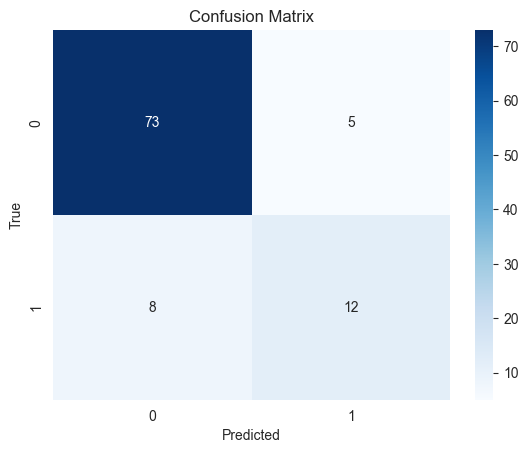

In [84]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()